In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1.

* Creatinine is a protein that is often used as an indicator of kidney function.
* YVLE1 is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
* REG1B is a protein that may be associated with pancreas regeneration
* TFF1 is trefoil factor 1, which may be related to regeneration and repair of the urinary tract
* Age and sex, both included in the dataset, may also play a role in who gets pancreatic cancer. 
* The goal is predicting diagnosis between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy).

In [ ]:
df = pd.read_csv('pancreatic cancer.csv')
df['diagnosis']= df.diagnosis == 3
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,False,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,False,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,False,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,False,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,False,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,True,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,True,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,True,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,True,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [ ]:
df.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [7]:
df.sex = df.sex.map({'M': 1, 'F': 0})

df.drop(['sample_id', 'patient_cohort', 'sample_origin',"REG1A","benign_sample_diagnosis",'stage'],axis=1,inplace=True)
df

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
0,33,0,False,11.7,1.83222,0.893219,52.948840,654.282174
1,81,0,False,NaN,0.97266,2.037585,94.467030,209.488250
2,51,1,False,7.0,0.78039,0.145589,102.366000,461.141000
3,61,1,False,8.0,0.70122,0.002805,60.579000,142.950000
4,62,1,False,9.0,0.21489,0.000860,65.540000,41.088000
...,...,...,...,...,...,...,...,...
585,68,1,True,NaN,0.52026,7.058209,156.241000,525.178000
586,71,0,True,NaN,0.85956,8.341207,16.915000,245.947000
587,63,1,True,NaN,1.36851,7.674707,289.701000,537.286000
588,75,0,True,NaN,1.33458,8.206777,205.930000,722.523000


In [8]:
df.isnull().sum()

age                0
sex                0
diagnosis          0
plasma_CA19_9    240
creatinine         0
LYVE1              0
REG1B              0
TFF1               0
dtype: int64

In [9]:
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())


In [10]:
df

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
0,33,0,False,11.700000,1.83222,0.893219,52.948840,654.282174
1,81,0,False,654.002944,0.97266,2.037585,94.467030,209.488250
2,51,1,False,7.000000,0.78039,0.145589,102.366000,461.141000
3,61,1,False,8.000000,0.70122,0.002805,60.579000,142.950000
4,62,1,False,9.000000,0.21489,0.000860,65.540000,41.088000
...,...,...,...,...,...,...,...,...
585,68,1,True,654.002944,0.52026,7.058209,156.241000,525.178000
586,71,0,True,654.002944,0.85956,8.341207,16.915000,245.947000
587,63,1,True,654.002944,1.36851,7.674707,289.701000,537.286000
588,75,0,True,654.002944,1.33458,8.206777,205.930000,722.523000


In [11]:
df.diagnosis.value_counts()

diagnosis
False    391
True     199
Name: count, dtype: int64

According to the information given previosuly, I decided to keep only the following columns as important variables for prediction:

In [9]:
# sns.pairplot(data = df, vars=['REG1B', 'creatinine', 'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde')


It seems that there is a higher frequency of low values for REGB1 in negative diagnoses (FALSE) than in positive diagnoses (TRUE). Similarly, in the case of TFF1, the values appear to be higher in positive diagnoses, and small values seem to be more frequent in negative diagnoses. The distribution of LYVE1 values with respect to the diagnosis looks promising, as there is a higher probability of high values in the case of a positive diagnosis (TRUE), and a higher probability of low values in the case of negative diagnoses (FALSE) and the distributions are more separated.

<Axes: >

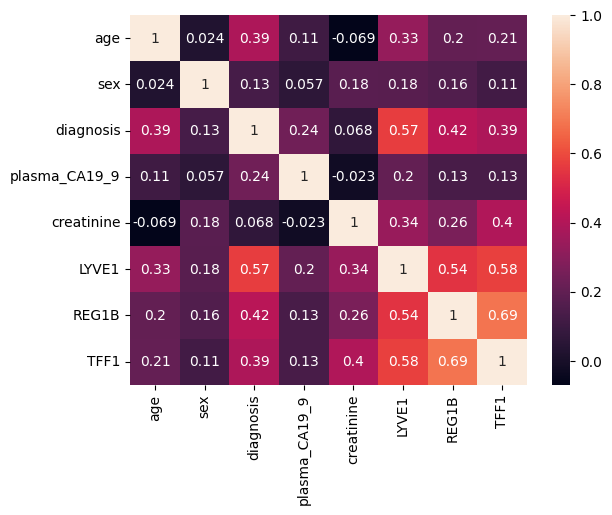

In [10]:
corr = df.dropna().corr()
sns.heatmap(corr, annot=True)

In [12]:

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']


In [12]:
# import imblearn
# from imblearn.over_sampling import SMOTE

# ros = SMOTE()  # You need to add parentheses to create an instance
# X_oversample, y_oversample = ros.fit_resample(X, y)

# print(X_oversample.shape)
# print(y_oversample.shape)

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X_oversample,y_oversample,random_state=1,test_size=0.2)

In [13]:
# pip install imblearn

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [14]:
X_train

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
67,60,1,654.002944,1.27803,3.816866,92.339660,105.992750
39,45,0,654.002944,0.85956,0.963804,29.522000,363.076000
392,57,1,10.000000,1.73043,2.628425,40.620818,529.984000
402,74,0,654.002944,0.13572,1.920327,219.129024,414.613900
147,71,1,654.002944,1.06314,3.268218,39.187536,577.062702
...,...,...,...,...,...,...,...
129,53,1,654.002944,0.28275,0.594000,10.828570,112.845500
144,48,0,654.002944,3.44955,4.512589,138.798730,1876.588322
72,34,0,0.813539,0.53157,0.008662,7.880360,8.662283
235,65,1,654.002944,0.35061,2.828798,28.639000,82.318000


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [29]:
X_train.shape

(472, 7)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.8135593220338984
Train accuracy: 0.864406779661017
********************
Confusion Matrix:
[[70  8]
 [14 26]]
********************
              precision    recall  f1-score   support

       False       0.83      0.90      0.86        78
        True       0.76      0.65      0.70        40

    accuracy                           0.81       118
   macro avg       0.80      0.77      0.78       118
weighted avg       0.81      0.81      0.81       118

********************
81.36% Accurate


In [2]:

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



NameError: name 'X_train' is not defined

In [23]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.847457627118644
train accuracy: 1.0
********************
0.8389830508474578
********************
              precision    recall  f1-score   support

       False       0.85      0.94      0.89        78
        True       0.84      0.68      0.75        40

    accuracy                           0.85       118
   macro avg       0.85      0.81      0.82       118
weighted avg       0.85      0.85      0.84       118

********************
84.75% Accurate


In [24]:
# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.8135593220338984
train accuracy: 0.8220338983050848
********************
0.7983050847457628
********************
              precision    recall  f1-score   support

       False       0.82      0.88      0.85        78
        True       0.74      0.62      0.68        40

    accuracy                           0.80       118
   macro avg       0.78      0.75      0.76       118
weighted avg       0.79      0.80      0.79       118

********************
81.36% Accurate


d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Codebook\cancer dataset\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [25]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,y,cv=5)
print(score.mean())
print('*'*20)

# print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.8983050847457628
train accuracy: 1.0
********************
0.8423728813559321
********************
********************
89.83% Accurate


In [21]:
test_prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [22]:
X_train

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
67,60,1,654.002944,1.27803,3.816866,92.339660,105.992750
39,45,0,654.002944,0.85956,0.963804,29.522000,363.076000
392,57,1,10.000000,1.73043,2.628425,40.620818,529.984000
402,74,0,654.002944,0.13572,1.920327,219.129024,414.613900
147,71,1,654.002944,1.06314,3.268218,39.187536,577.062702
...,...,...,...,...,...,...,...
129,53,1,654.002944,0.28275,0.594000,10.828570,112.845500
144,48,0,654.002944,3.44955,4.512589,138.798730,1876.588322
72,34,0,0.813539,0.53157,0.008662,7.880360,8.662283
235,65,1,654.002944,0.35061,2.828798,28.639000,82.318000


In [26]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_prediction})
print(comparison_df)


     Actual  Predicted
509    True          1
257   False          0
23    False          0
458    True          1
90    False          0
..      ...        ...
82    False          0
368   False          0
232   False          0
479    True          1
34    False          0

[118 rows x 2 columns]


In [28]:
value = df.iloc[82]
value

age                    71
sex                     0
diagnosis           False
plasma_CA19_9    0.730948
creatinine         0.3393
LYVE1            0.003753
REG1B            4.948546
TFF1             3.753461
Name: 82, dtype: object

In [50]:
import tensorflow as tf
import keras
import warnings
warnings.simplefilter('ignore')

In [51]:
# pip install tensorflow

In [57]:
# Ann deep learning
from keras.models import Sequential
ann = Sequential()
from keras.layers import Dense

ann.add(Dense(input_dim= 7, units= 6, kernel_initializer= 'uniform',activation = 'relu'))


In [58]:
# adding second hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# adding output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])


In [59]:
ann.fit(X_train,y_train,epochs =100,batch_size = 32)

Epoch 1/100
15/15 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.6504
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.6631
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6866 - accuracy: 0.6631
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.6631
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.6822
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6685 - accuracy: 0.7415
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6568 - accuracy: 0.7903
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.8199
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6227 - accuracy: 0.8157
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6018 - accuracy: 0.8114
Epoch 11/

In [61]:
train_prediction = ann.predict(X_train)
test_prediction = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [63]:
test_prediction = (test_prediction>=0.5)
train_prediction = (train_prediction>=0.5)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix

print('test accuracy:', accuracy_score(y_test,test_prediction))
print('train accuracy:', accuracy_score(y_train,train_prediction))
print(confusion_matrix(y_test,test_prediction))


ann_hc = accuracy_score(y_test,test_prediction)
print(f"{round(ann_hc*100,2)}% Accurate")

test accuracy: 0.8305084745762712
train accuracy: 0.8432203389830508
[[72  6]
 [14 26]]
83.05% Accurate


In [66]:
import pickle
#save the model
model = ann  # Your machine learning model object
file_path = 'ann_pancrease.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [15]:
# load the model
import pickle
file_path = 'ann_pancrease.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'ann_pancrease.pkl'

In [17]:
import pickle
file_path = 'XGB_pancrease.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [30]:
loaded_model.predict([[29,1,654.002944,1.27803,3.816866,92.339660,105.992750]])

array([1])

In [32]:
value = df.iloc[368]
value

age                    29
sex                     1
diagnosis           False
plasma_CA19_9        13.0
creatinine        0.21489
LYVE1            3.719767
REG1B              12.739
TFF1              122.842
Name: 368, dtype: object

In [33]:
loaded_model.predict([[29,1,13.0,0.21489,3.719767,12.739,122.842]])

array([1])

In [ ]:
0   33	0	False	11.700000	1.83222	0.893219	52.948840	654.282174
1	81	0	False	654.002944	0.97266	2.037585	94.467030	209.488250
2	51	1	False	7.000000	0.78039	0.145589	102.366000	461.141000
3	61	1	False	8.000000	0.70122	0.002805	60.579000	142.950000
4	62	1	False	9.000000	0.21489	0.000860	65.540000	41.088000

In [73]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ann_hc]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','ANN'],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
4,XGBoost,0.898305
1,Random Forest,0.847458
5,ANN,0.830508
2,Logistic Regression,0.813559
3,Knn,0.813559
0,Decision Tree,0.796610


In [25]:
# Oversampling

# score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC]
# Models = pd.DataFrame({
#     'n_neighbors': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost'],
#     'Score': score})
# Models.sort_values(by='Score', ascending=False)

# save the model and predict

In [26]:
import pickle
#save the model
model = XGB  # Your machine learning model object
file_path = 'XGB_pancrease.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [27]:
# load the model

file_path = 'XGB_pancrease.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [28]:
X_train

array([[ 0.05820012,  1.01709526,  0.02631604, ...,  0.18961324,
        -0.09927831, -0.48129155],
       [-1.0676382 , -0.98319208,  0.02631604, ..., -0.62180662,
        -0.4265193 , -0.2366048 ],
       [-0.16696755,  1.01709526, -0.35545676, ..., -0.14838314,
        -0.36870135, -0.07774506],
       ...,
       [-1.89325296, -0.98319208, -0.36090261, ..., -0.89345194,
        -0.53925881, -0.57392877],
       [ 0.43347955,  1.01709526,  0.02631604, ..., -0.09139642,
        -0.43111918, -0.50382471],
       [-0.84247054, -0.98319208,  0.02631604, ..., -0.89552953,
        -0.5703763 , -0.57927614]])

In [29]:
loaded_model.predict([[60,1,654.002944,1.27803,3.816866,92.339660,105.992750]])

array([1])

In [30]:
y_train

67     False
39     False
392     True
402     True
147    False
       ...  
129    False
144    False
72     False
235    False
37     False
Name: diagnosis, Length: 472, dtype: bool